In [1]:
import sys
import os
import sympy as sp
import numpy as np

# Add the correct path to the P2 folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from data_handler import add_column_to_file


In [2]:
var_names=[T, U1, U2, U3, U4, T0]=sp.symbols('T U1 U2 U3 U4 T0')
formula_list=[
    T**4- T0**4,
    U1/3,
    U2/3,
    U3/3,
    U4/3,
    ]
evaluate_gaussian_error('b_daten_korrigiert.txt',formulas=formula_list, variables=var_names, result_length=2,result_names=['T^4-T0^4', 'Phi/A_sp[W/m^2]', 'Phi/A_ma[W/m^2]', 'Phi/A_we[W/m^2]', 'Phi/A_sw[W/m^2]'])

sqrt((4*T**3*del_T)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (-4*T0**3*del_T0)**2)
sqrt((0)**2 + (del_U1/3)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_U2/3)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_U3/3)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_U4/3)**2 + (0)**2)
Zeile 1: [105322735.0, 74475787.49, 0.0, 0.03, 0.0, 0.03, 1.0, 0.03, 0.97, 0.03]
Zeile 2: [648064800.0, 76424792.28, 0.17, 0.03, 0.4, 0.03, 2.63, 0.03, 2.53, 0.03]
Zeile 3: [1218350815.0, 78486612.81, 0.27, 0.03, 0.7, 0.03, 4.33, 0.03, 4.2, 0.03]
Zeile 4: [1817097280.0, 80663204.48, 0.5, 0.03, 1.03, 0.03, 6.07, 0.03, 6.03, 0.03]
Zeile 5: [3103712560.0, 85367727.57, 0.9, 0.03, 1.87, 0.03, 9.67, 0.03, 9.57, 0.03]
Zeile 6: [3793489375.0, 87898813.53, 1.33, 0.03, 2.33, 0.03, 12.23, 0.03, 12.03, 0.03]
Zeile 7: [4515542640.0, 90551007.45, 1.73, 0.03, 2.73, 0.03, 14.3, 0.03, 13.93, 0.03]
Zeile 8: [6060459520.0, 96223752.3, 2.17, 0.03, 3.83, 0.03, 18.63, 0.

Fit-Ergebnisse für Spiegelnd:
Schwerpunkt: (3860000000 ± 30000000, 1.36 ± 0.03)
Steigung: 0.000 ± 0.009
Y-Achsenabschnitt: -0 ± 40000000

Fit-Ergebnisse für Matt:
Schwerpunkt: (3860000000 ± 30000000, 2.37 ± 0.03)
Steigung: 0.000 ± 0.009
Y-Achsenabschnitt: -0 ± 40000000

Fit-Ergebnisse für Weiß:
Schwerpunkt: (3860000000 ± 30000000, 12.07 ± 0.03)
Steigung: 0.000 ± 0.009
Y-Achsenabschnitt: 0 ± 40000000

Fit-Ergebnisse für Schwarz:
Schwerpunkt: (3860000000 ± 30000000, 11.97 ± 0.03)
Steigung: 0.000 ± 0.009
Y-Achsenabschnitt: 0 ± 40000000



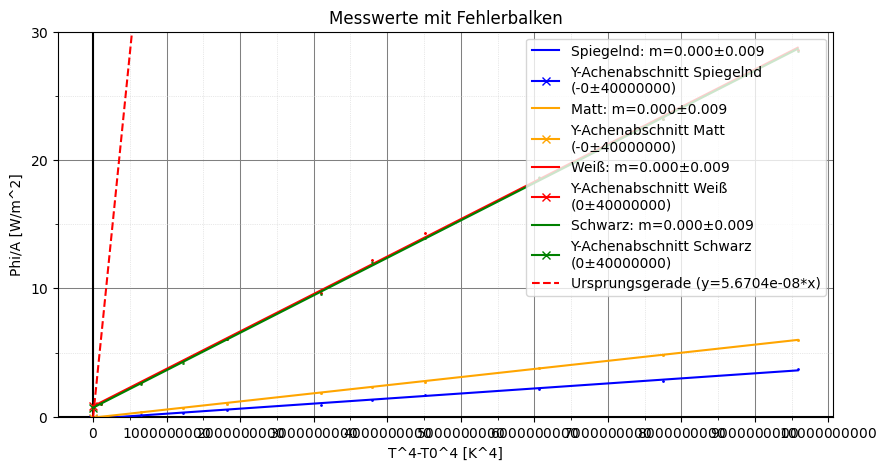

In [5]:
geraden_fit('b_daten_korrigiert_results.txt', Titel = 'Abb. 2: Aufgabe b) Bestimmung der abgestrahlten Leistung',
             x_label = r'T^4-T0^4 [K^4]', y_label = r'Phi/A [W/m^2]', 
                save = True, y_colors = ['blue', 'orange', 'red', 'green'], x_major_ticks = 1000000000, x_minor_ticks = 500000000, y_major_ticks = 10, y_minor_ticks = 5,
                focus_point = False, y_labels = ['Spiegelnd', 'Matt', 'Weiß', 'Schwarz'], plot_x_inter = False, plot_errors=False, plot_y_inter=True,
                Ursprungsgerade = 5.6704*10**(-8), y_max = 30, y_min = 0, legendlocation = 'upper right'
            )